In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

## Loss functions for classification

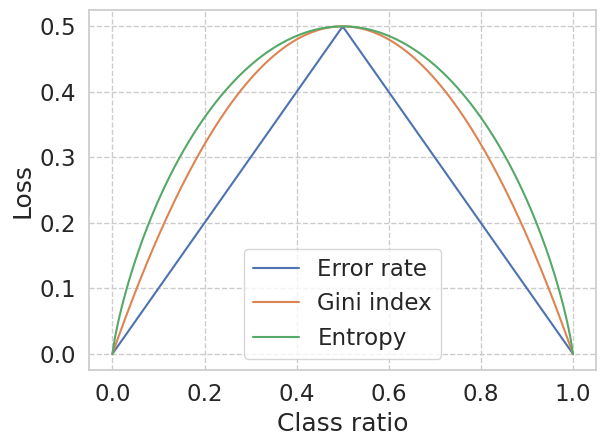

In [2]:
def error_rate(p: float):
    """Classification error rate for a given binary class ratio"""
    return p if p < 0.5 else 1 - p

def gini_index(p: float):
    """Gini index for a given binary class ratio."""
    return 2 * p * (1 - p)

def entropy(p: float):
    """Entropy for a given binary class ratio, normalized by ln(2)"""
    return -(p * np.log(p + 1e-16) + (1 - p) * np.log(1 - p + 1e-16)) / (np.log(2) / 0.5)

p = np.linspace(start=0, stop=1, num=200)
plt.figure()
sns.lineplot(x=p, y=[error_rate(x) for x in p], label="Error rate")
sns.lineplot(x=p, y=[gini_index(x) for x in p], label="Gini index")
sns.lineplot(x=p, y=[entropy(x) for x in p], label="Entropy")

plt.ylabel("Loss")
plt.xlabel("Class ratio")
plt.tight_layout()
plt.show()

## Binary classification example

In [3]:
cancer = pd.read_csv("https://raw.githubusercontent.com/changyaochen/MECE4520/master/data/breast_cancer.csv")
cancer["label"] = cancer["diagnosis"].apply(lambda x: 0 if x == "B" else 1)
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_mean,...,texture_extreme,perimeter_extreme,area_extreme,smoothness_extreme,compactness_extreme,concavity_extreme,concave_extreme,symmetry_extreme,fractal_extreme,label
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [4]:
from sklearn import tree

dt_model = tree.DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
)
features = [
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean",
    "concavity_mean",
    "concave_mean",
    "symmetry_mean",
    "fractal_mean",
    "radius_se",
    "texture_se",
    "perimeter_se",
    "area_se",
    "smoothness_se",
    "compactness_se",
    "concavity_se",
    "concave_se",
    "symmetry_se",
    "fractal_se",
    "radius_extreme",
    "texture_extreme",
    "perimeter_extreme",
    "area_extreme",
    "smoothness_extreme",
    "compactness_extreme",
    "concavity_extreme",
    "concave_extreme",
    "symmetry_extreme",
    "fractal_extreme",
]
label = "label"
dt_model.fit(X=cancer[features], y=cancer[label])

DecisionTreeClassifier(max_depth=3)

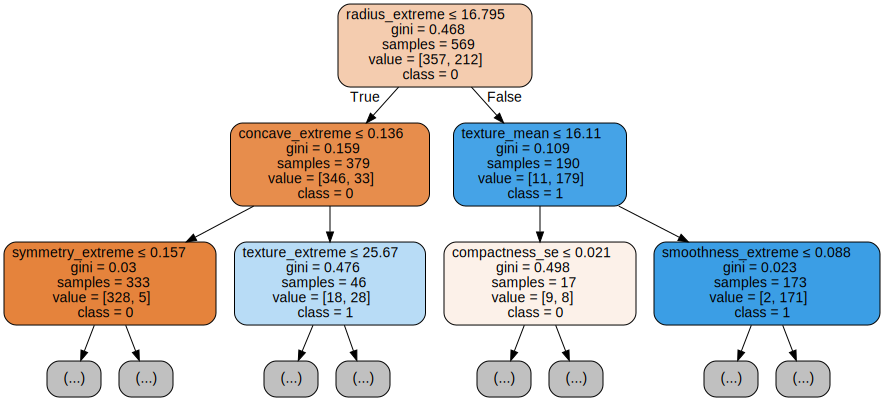

In [5]:
import graphviz

dot_data = tree.export_graphviz(
    decision_tree=dt_model, 
    out_file=None, 
    feature_names=features,  
    class_names=["0", "1"],  
    filled=True, 
    rounded=True,  
    special_characters=True,
    max_depth=2,
)  
graph = graphviz.Source(dot_data)  
graph.render("cancer_tree")
graph